In [169]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import uniform
from scipy.stats import poisson
import numpy as np
%matplotlib inline

# Variable Transformation

1-3)

Text(0, 0.5, 'Density (1/x)')

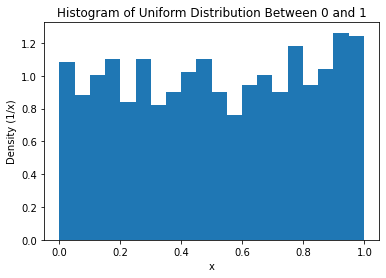

In [47]:
# Get a random sample of 1000 points from a uniform pdf.
x = uniform.rvs(size=1000)

# Calculate the transformed variable u = x^2.
u = np.square(x)

# Plot the analytic and experimental versions of our pdfs.
x_i = np.linspace(0.001,1,1000)
fig = plt.hist(x, bins = 20, density=True)
plt.title("Histogram of Uniform Distribution Between 0 and 1")
plt.xlabel("x")
plt.ylabel("Density (1/x)")

Text(0, 0.5, 'Density (1/x)')

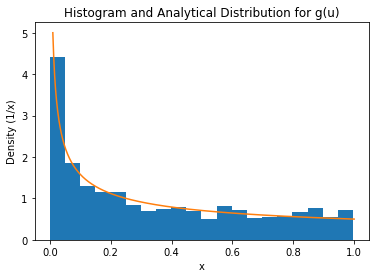

In [94]:
# Plot the analytic and experimental versions of our transformed variable.
u_i = np.linspace(0.01,1,1000)
fig = plt.hist(u, bins = 20, density=True)
# TODO Describe in Markdown cell above how we got g(u) = 1/sqrt(2x) for analytical distribution.
g = 1 / (2*np.sqrt(x_i))
plt.plot(x_i, g)
plt.title("Histogram and Analytical Distribution for g(u)")
plt.xlabel("x")
plt.ylabel("Density (1/x)")

4) Steps 1-3 with $u_2 = e^x$

In this case, we have $x = \ln(u_2)$, so $\frac{dx}{du_2} = \frac{1}{u_2}$, which implies that $g_2(u) = f(x(u_2)) \ |\frac{dx}{du_2}| = \frac{1}{u_2}$, which should be our analytical distribution. Let us confirm this below:

Text(0, 0.5, 'Density (1/x)')

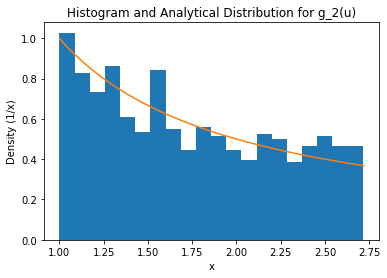

In [95]:
# Calculate the transformed variable u = x^2.
u_2 = np.exp(x)

# Plot the analytic and experimental versions of our transformed variable.
fig_2 = plt.hist(u_2, bins = 20, density=True)
u_i_2 = np.linspace(1,np.e,1000)
g_2 = 1 / u_i_2
plt.plot(u_i_2, g_2)
plt.title("Histogram and Analytical Distribution for g_2(u)")
plt.xlabel("x")
plt.ylabel("Density (1/x)")

# Throwing Two Dice

In [162]:
# Calculate sums of 1000 rolls of a pair of dice.
die_1 = np.int_(6*np.random.uniform(size=1000)) + 1
die_2 = np.int_(6*np.random.uniform(size=1000)) + 1
dice_sum = die_1 + die_2

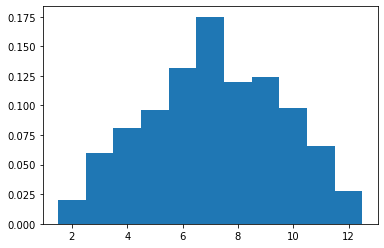

In [163]:
# Plot of random selection of sums of 1000 rolls of a pair of dice.
fig_3 = plt.hist(dice_sum, bins=np.linspace(1.5,12.5,12), density=True)

In [164]:
# Calculate mean and variance of distribution of sum.
dice_sum_mean = np.mean(dice_sum)
dice_sum_var = np.var(dice_sum)

print("Mean of dice roll sums: ", dice_sum_mean)
print("Variance of dice roll sums: ", dice_sum_var)

Mean of dice roll sums:  7.159
Variance of dice roll sums:  5.933719000000001


The sum of the dice rolls can be modeled by a binomial distribution, which has a standard deviation of $\sqrt{n(p)(1-p)}$, where $p$ is the experimental probability of obtaining a sum of 7 on two dice. Finally, we must take this result and divide by $n=1000$ in order to get the uncertainty in the probability rather than in the number of counts of 7.

In [166]:
# Calculate the probability of sevens (i.e., that the sum of two dice equals 7).
seven_counts = np.count_nonzero(dice_sum == 7)
p_7_exp = seven_counts / len(dice_sum)
p_7_exp_unc = np.sqrt(1000*p_7_exp*(1-p_7_exp)) / 1000
print("Experimental probability of getting a sum of 7: ", p_7_exp, "+/-", p_7_exp_unc)
p_7_theo = 6 / 36
print("Theoretical probability of getting a sum of 7: ", p_7_theo)

Experimental probability of getting a sum of 7:  0.175 +/- 0.012015614840697917
Theoretical probability of getting a sum of 7:  0.16666666666666666


6. From the homework, the analytic probability of getting a 7 is $\frac{1}{6} \approx 0.167$. Since our experimental probability combined with our uncertainty could accept a value between $0.175 - 0.012 = 0.163$ and $0.175 + 0.012 = 0.187$, and $0.167$ is within this range, our experimental result agrees with the theoretical probability.

# Central Limit Theorem

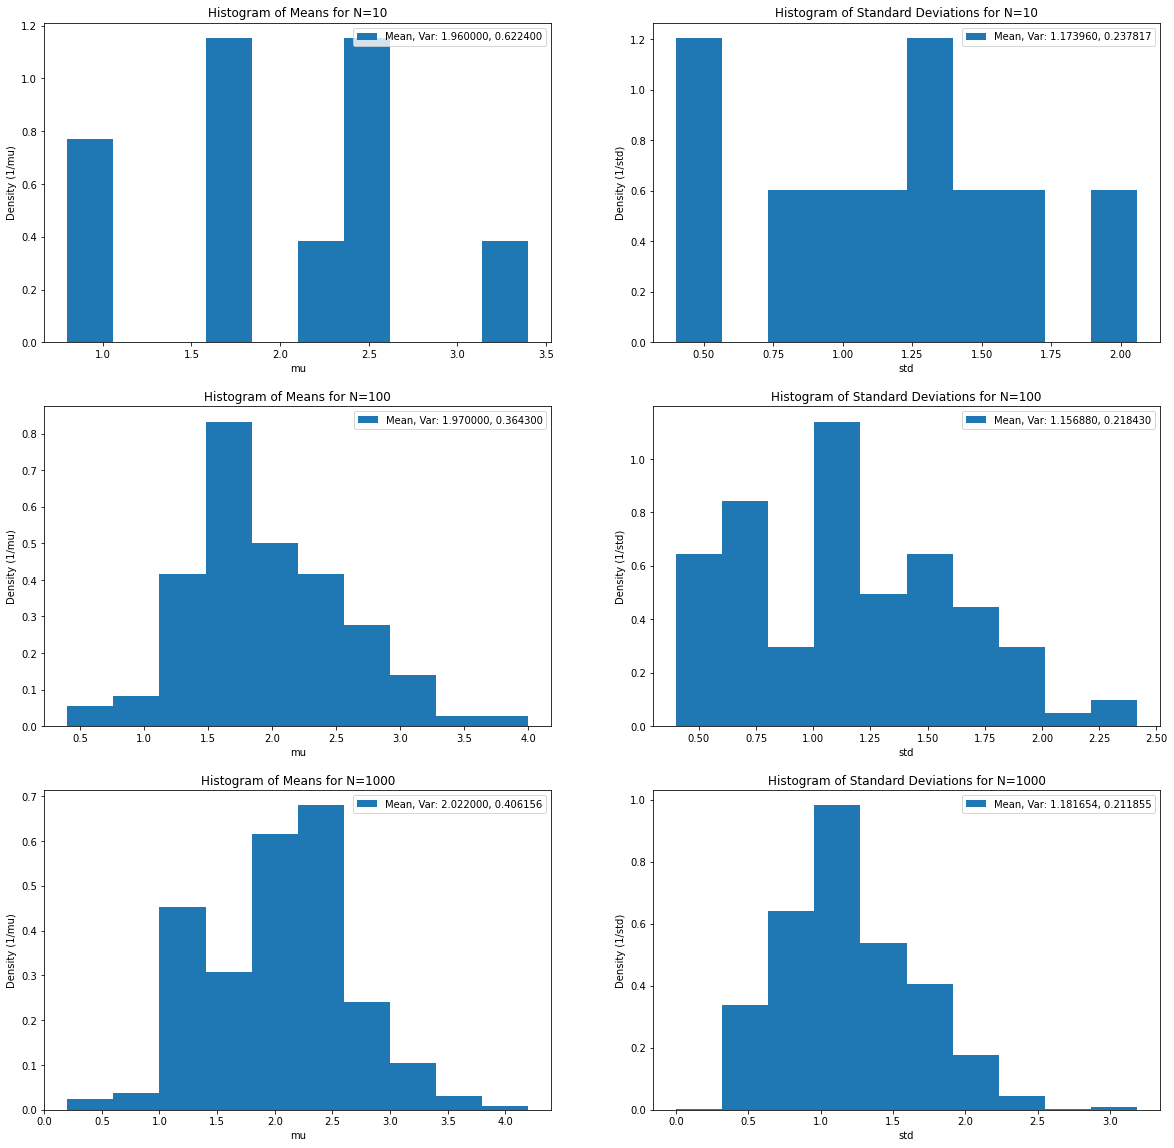

In [224]:
# Plot N different sets of 5 samples of Poisson distributions.
Ns = [10, 100, 1000]
fig, ax = plt.subplots(3,2, figsize=[20,20])

for i in range(0,3):
    N = Ns[i]
    # Store the means and standard deviations of 5 separate distributions.
    mus = np.zeros(N)
    stds = np.zeros(N)

    # Create 5 Poisson distributions of size 5.
    for j in range(0,N):
        psn = poisson.rvs(mu = 2, size = 5)
        mus[j] = np.mean(psn)
        stds[j] = np.std(psn)

    # Plot histogram of the means w/ mean and variance in the legend.
    ax[i][0].hist(mus, bins=10, density=True, label='Mean, Var: {:f}, {:f}'.format(np.mean(mus), np.var(mus)))
    ax[i][0].set_title("Histogram of Means for N="+str(N))
    ax[i][0].set_xlabel("mu")
    ax[i][0].set_ylabel("Density (1/mu)")
    ax[i][0].legend(loc="upper right")
    # Plot histogram of the standard deviations w/ mean and variance in the legend.
    ax[i][1].hist(stds, bins=10, density=True, label='Mean, Var: {:f}, {:f}'.format(np.mean(stds), np.var(stds)))
    ax[i][1].set_title("Histogram of Standard Deviations for N="+str(N))
    ax[i][1].set_xlabel("std")
    ax[i][1].set_ylabel("Density (1/std)")
    ax[i][1].legend(loc="upper right")

As $N$ increases, we can see that $\mu_5$ and $\sigma_5$ appear to approach normal distributions as expected per the central limit theorem. (??? Scaling rule ???)